In [5]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funksjoner import Del1

filnavn = "../data/table.csv"

# Oppgave 2:


In [9]:
del1 = Del1(filnavn)
data = del1.load_data()

# Sjekke datatyper og for manglende verdier
print(sqldf("SELECT * FROM data LIMIT 1", locals()), '\n')
print("Datatyper:\n", data.dtypes)
print("Manglende verdier:\n", data.isnull().sum(), "\n")


           Navn  Stasjon Tid(norsk normaltid) Høyeste vindkast (1 t)  \
0  Slettnes Fyr  SN96400     01.01.2024 01:00                   10,3   

  Lufttemperatur  
0           -7,2   

Datatyper:
 Navn                      object
Stasjon                   object
Tid(norsk normaltid)      object
Høyeste vindkast (1 t)    object
Lufttemperatur            object
dtype: object
Manglende verdier:
 Navn                      0
Stasjon                   1
Tid(norsk normaltid)      1
Høyeste vindkast (1 t)    1
Lufttemperatur            1
dtype: int64 



# Oppgave 3:


In [5]:
# lagre parametre for de interesserte kolonnene
time = "Tid(norsk normaltid)"
vind = "Høyeste vindkast (1 t)"
temp = "Lufttemperatur"

data = del1.clean_data()
data = del1.convert_to_datetime(time)
data = del1.convert_to_numerical(vind)
data = del1.convert_to_numerical(temp)


# Sjekke datatyper og for manglende verdier
print("Datatyper:\n", data.dtypes)
print("Manglende verdier:\n", data.isnull().sum(), "\n")

Datatyper:
 Navn                              object
Stasjon                           object
Tid(norsk normaltid)      datetime64[ns]
Høyeste vindkast (1 t)           float64
Lufttemperatur                   float64
dtype: object
Manglende verdier:
 Navn                      0
Stasjon                   1
Tid(norsk normaltid)      1
Høyeste vindkast (1 t)    1
Lufttemperatur            1
dtype: int64 



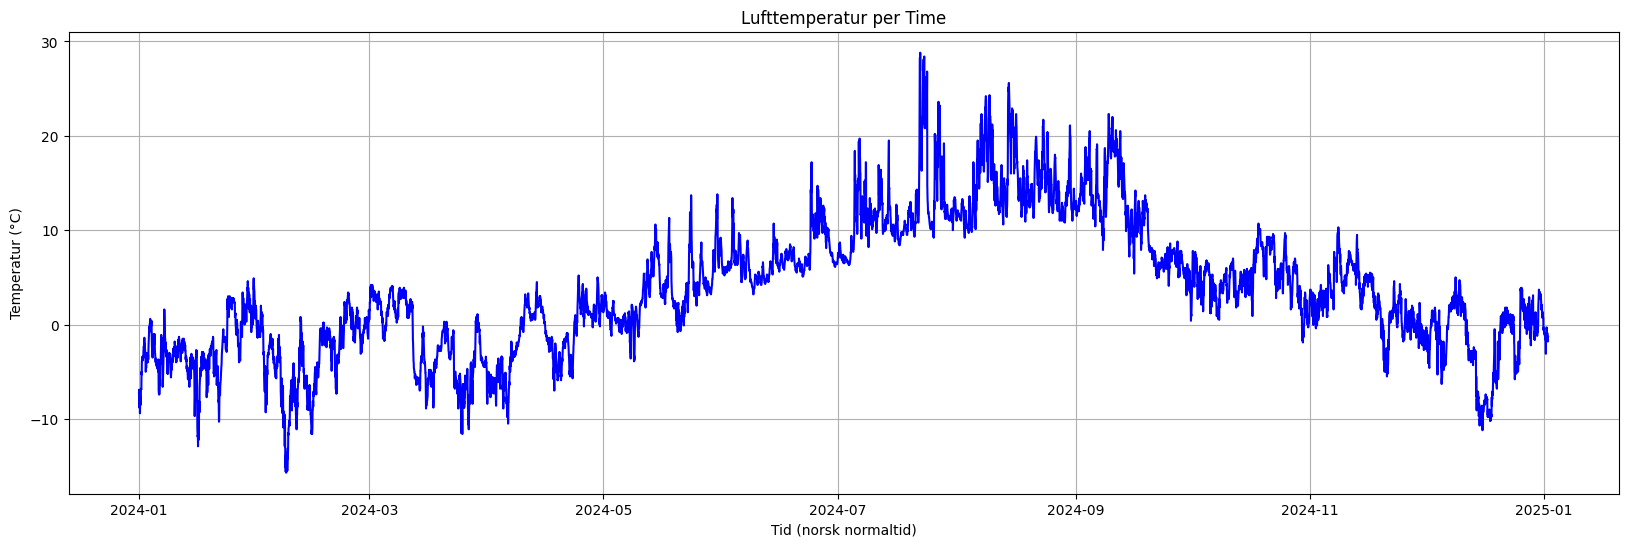

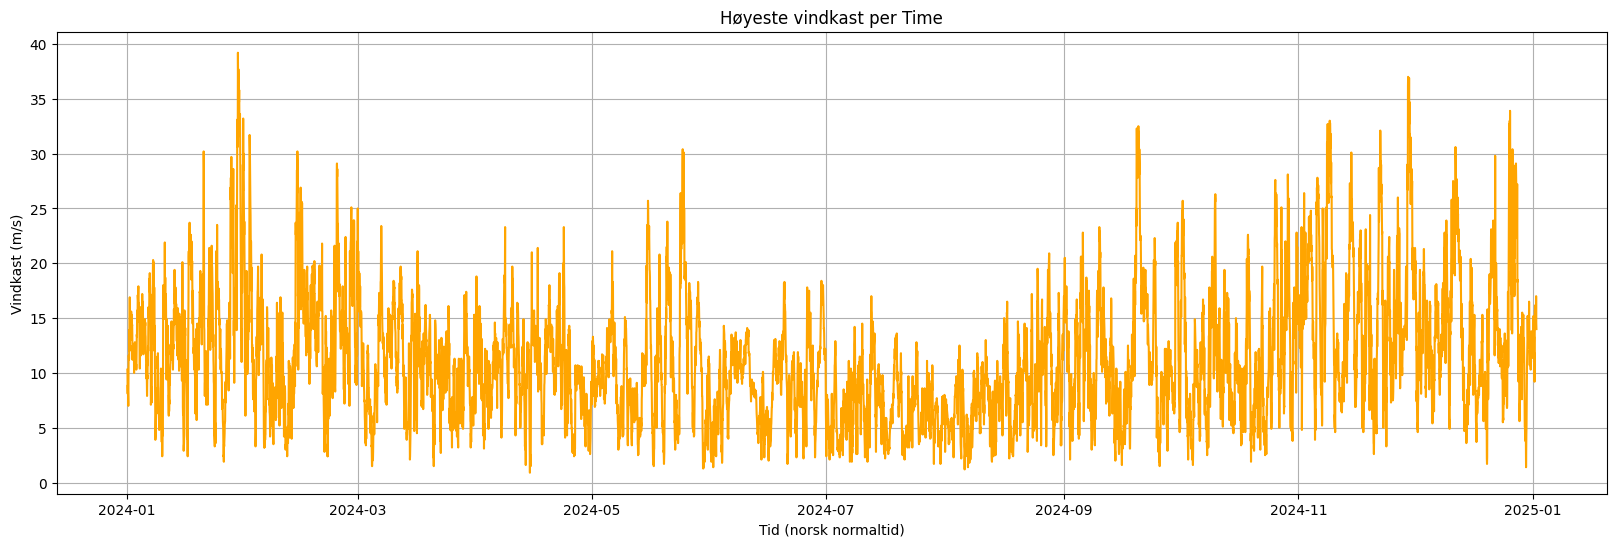

In [6]:
def plot_data(data):
    # Sjekke om data er tomt
    if data.empty:
        print("Ingen data å plotte.")
        return

    # Plotte gjennomsnittlig temperatur per time
    plt.figure(figsize=(20, 6))
    plt.plot(data[time], data[temp], color='blue')
    plt.title('Lufttemperatur per Time')
    plt.xlabel('Tid (norsk normaltid)')
    plt.ylabel('Temperatur (°C)')
    plt.grid()
    plt.show()

    # Plotte gjennomsnittlig nedbør per time
    plt.figure(figsize=(20, 6))
    plt.plot(data[time], data[vind], color='orange')
    plt.title('Høyeste vindkast per Time')
    plt.xlabel('Tid (norsk normaltid)')
    plt.ylabel('Vindkast (m/s)')
    plt.grid()
    plt.show()

plot_data(data)